In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fasttext
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

## Model Training

In this step we'll train the model using diffenernt parametres to chose the better obion

In [2]:
model = fasttext.train_supervised(
    input="data/test_data.txt",
    lr=0.1,  
    epoch=5,
    wordNgrams=2,
    bucket=200000,
    dim=50,
    loss="ova"
)

In [3]:
model.test("data/val_data.txt")

(757, 0.6446499339498019, 0.22878574777308955)

In [4]:
model2 = fasttext.train_supervised(
    input="data/test_data.txt",
    lr=0.1,  
    epoch=10,
    wordNgrams=3,
    bucket=200000,
    dim=50,
    loss="ova"
)

In [5]:
model2.test("data/val_data.txt")

(757, 0.7278731836195509, 0.2583216127519925)

In [8]:
model3 = fasttext.train_supervised(
    input="data/test_data.txt",
    lr=0.1,  
    epoch=50,
    wordNgrams=3,
    bucket=200000,
    dim=50,
    loss="ova"
)

In [9]:
model3.test("data/val_data.txt")

(757, 0.869220607661823, 0.30848570089076416)

In [16]:
model5 = fasttext.train_supervised(
    input="data/test_data.txt",
    lr=0.1,  
    epoch=100,
    wordNgrams=3,
    bucket=200000,
    dim=50,
    loss="ova"
)

In [17]:
model5.test("data/val_data.txt")

(757, 0.892998678996037, 0.316924519456165)

In [32]:
model6 = fasttext.train_supervised(
    input="data/test_data.txt",
    lr=0.1,  
    epoch=200,
    wordNgrams=3,
    bucket=200000,
    dim=50,
    loss="ova"
)

In [19]:
model6.test("data/val_data.txt")

(757, 0.9009247027741083, 0.3197374589779653)

In [23]:
model7 = fasttext.train_supervised(
    input="data/test_data.txt",
    lr=0.1,  
    epoch=250,
    wordNgrams=3,
    bucket=200000,
    dim=50,
    loss="ova"
)

In [24]:
model7.test("data/val_data.txt")

(757, 0.8863936591809776, 0.3145804031879981)

In [27]:
model8 = fasttext.train_supervised(
    input="data/test_data.txt",
    lr=0.05,  
    epoch=200,
    wordNgrams=3,
    bucket=200000,
    dim=50,
    loss="ova"
)

In [28]:
model8.test("data/val_data.txt")

(757, 0.8956406869220608, 0.3178621659634318)

In [29]:
model9 = fasttext.train_supervised(
    input="data/test_data.txt",
    lr=0.15,  
    epoch=200,
    wordNgrams=3,
    bucket=200000,
    dim=50,
    loss="ova"
)

In [30]:
model9.test("data/val_data.txt")

(757, 0.8797886393659181, 0.31223628691983124)

In [33]:
model10 = fasttext.train_supervised(
    input="data/test_data.txt",
    lr=0.1,  
    epoch=200,
    wordNgrams=2,
    bucket=200000,
    dim=50,
    loss="ova"
)

In [34]:
model10.test("data/val_data.txt")

(757, 0.8890356671070013, 0.31551804969526487)

In [42]:
models = {
    "Model1": model.test("data/val_data.txt"),
    "Model2": model2.test("data/val_data.txt"),
    "Model3": model3.test("data/val_data.txt"),
    "Model5": model5.test("data/val_data.txt"),
    "Model6": model6.test("data/val_data.txt"),
    "Model7": model7.test("data/val_data.txt"),
    "Model8": model8.test("data/val_data.txt"),
    "Model9": model9.test("data/val_data.txt"),
    "Model10": model10.test("data/val_data.txt")
}

In [43]:
results = []
for name, (rows_no, accuracy, recall) in models.items():
    results.append({"Model": name, "Accuracy": accuracy * 100, "Recall": recall * 100}) 

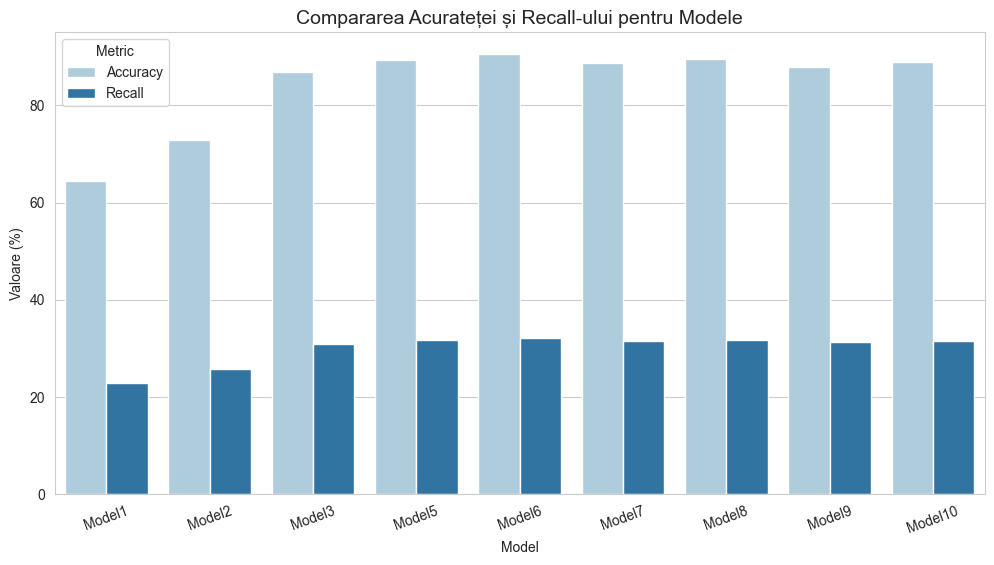

In [44]:
df = pd.DataFrame(results)

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(12, 6))

df_melted = df.melt(id_vars="Model", var_name="Metric", value_name="Value")
sns.barplot(data=df_melted, x="Model", y="Value", hue="Metric", palette="Paired", ax=ax)

ax.set_title("Compararea Acurateței și Recall-ului pentru Modele", fontsize=14)
ax.set_ylabel("Valoare (%)")
plt.xticks(rotation=20)
plt.show()

In [45]:
models

{'Model1': (757, 0.6446499339498019, 0.22878574777308955),
 'Model2': (757, 0.7278731836195509, 0.2583216127519925),
 'Model3': (757, 0.869220607661823, 0.30848570089076416),
 'Model5': (757, 0.892998678996037, 0.316924519456165),
 'Model6': (757, 0.904887714663144, 0.32114392873886544),
 'Model7': (757, 0.8863936591809776, 0.3145804031879981),
 'Model8': (757, 0.8956406869220608, 0.3178621659634318),
 'Model9': (757, 0.8797886393659181, 0.31223628691983124),
 'Model10': (757, 0.8890356671070013, 0.31551804969526487)}

In [46]:
model6.save_model("fasttext_model.bin")

## Conclusion

In conclusion, based on an accuracy of 90.49% and a recall of 32.11%, the best model to work with at the moment is Model6.